In [2]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exercício Sala
## Vamos repetir todos os passo agora com a base Startup.txt.

In [4]:
# Leitura da base de dados

startup = pd.read_csv(
    "C:/_Ayu/0-Fia/_2020/TURMAS/EA_EAD_ago20/Python/Aula1/Startup.txt", sep="\t")

#dados_lim_cred_esc = pd.read_csv(
#    "C:/_Ayu/0-Fia/_2020/TURMAS/EA_EAD_ago20/Python/Aula1/Limite_Credito_Escolaridade.txt", sep="\t")

# Mostra as primeiras linhas da base de dados
dados_lim_cred_esc.head(3)

,Investimento_PeD,Investimento_em_Mkt,Gastos_Administrativos,Estado,Lucro
0,0.00,45173.06,116983.80,Rio de Janeiro,14681.40
1,542.05,0.00,51743.15,São Paulo,35673.41
2,0.00,0.00,135426.92,Rio de Janeiro,42559.73


In [5]:
# Mostra o nome das colunas
dados_lim_cred_esc.columns 

Index(['Investimento_PeD', 'Investimento_em_Mkt', 'Gastos_Administrativos',
       'Estado', 'Lucro'],
      dtype='object')

In [6]:
# Mostra o tipo de variável
dados_lim_cred_esc.dtypes

Investimento_PeD          float64
Investimento_em_Mkt       float64
Gastos_Administrativos    float64
Estado                     object
Lucro                     float64
dtype: object

In [7]:
# Mostra a estrutura da matriz de dados
dados_lim_cred_esc.shape 

(50, 5)

In [8]:
# Análise Exploratória Univariada
# dados_lim_cred.describe() usando a tranposição da matriz de dados com transpose()
dados_lim_cred_esc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Investimento_PeD,50.0,67424.601245,41185.051054,0.00,38452.010938,70967.815,94662.8225,144372.41
Investimento_em_Mkt,50.0,209025.097800,124478.728642,0.00,122123.667500,212716.240,299469.0850,471784.10
Gastos_Administrativos,50.0,121344.639600,28017.802755,51283.14,103730.875000,122699.795,144842.1800,182645.56
Lucro,50.0,112012.639200,40306.180338,14681.40,90138.902500,107978.190,139765.9775,192261.83


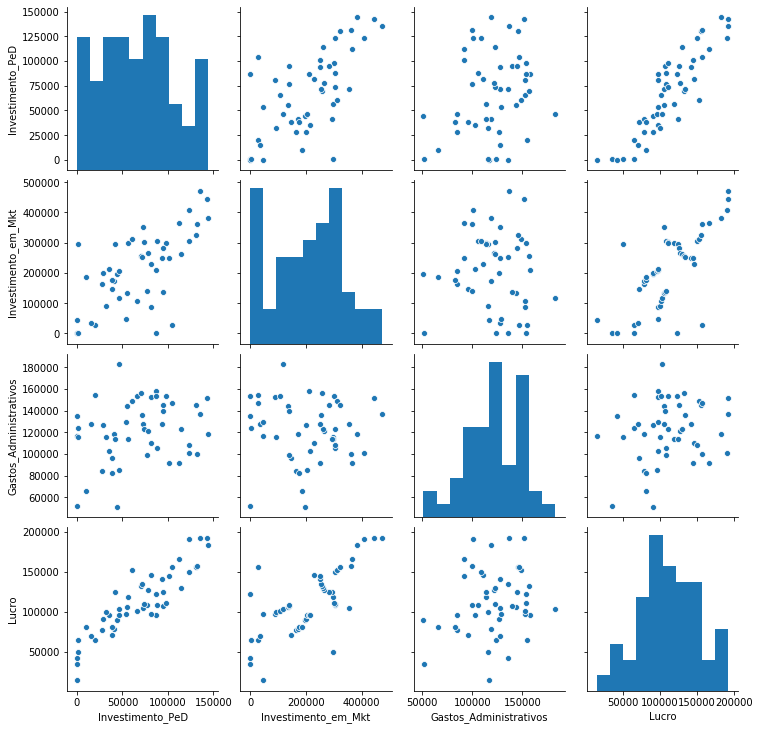

In [9]:
# Análise Exploratória Bivariada
sns.pairplot(dados_lim_cred_esc)

In [10]:
# Matriz de correlação
round(dados_lim_cred_esc.corr(),2)

,Investimento_PeD,Investimento_em_Mkt,Gastos_Administrativos,Lucro
Investimento_PeD,1.00,0.66,0.24,0.90
Investimento_em_Mkt,0.66,1.00,-0.05,0.72
Gastos_Administrativos,0.24,-0.05,1.00,0.20
Lucro,0.90,0.72,0.20,1.00


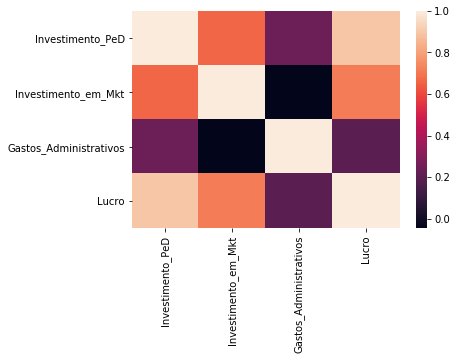

In [11]:
# Mapa de calor da matriz de correlação, usando seaboarn (sns)
sns.heatmap(dados_lim_cred_esc.corr())

### Análise bivariada: qualitativa x quantitativa

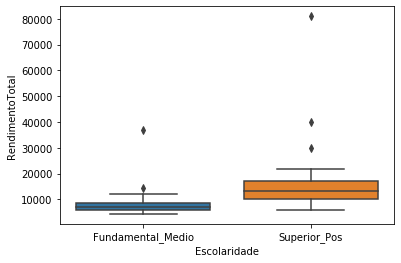

In [43]:
boxplot_b_1 = sns.boxplot(x="Escolaridade", y="RendimentoTotal",
                 data=dados_lim_cred_esc)

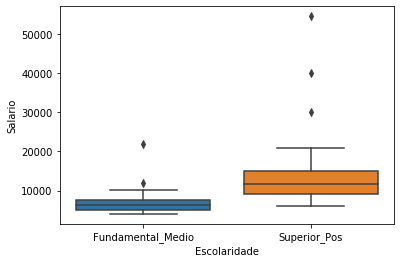

In [14]:
boxplot_b_2 = sns.boxplot(x="Escolaridade", y="Salario",
                 data=dados_lim_cred_esc)

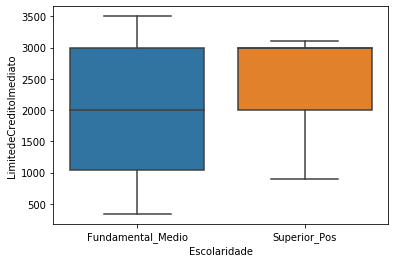

In [15]:
boxplot_b_3 = sns.boxplot(x="Escolaridade", y="LimitedeCreditoImediato",
                 data=dados_lim_cred_esc)

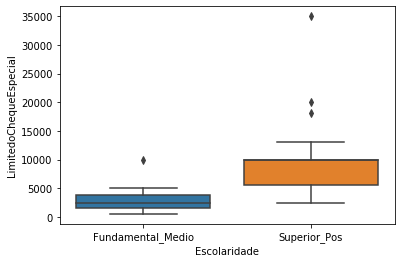

In [16]:
boxplot_b_4 = sns.boxplot(x="Escolaridade", y="LimitedoChequeEspecial",
                 data=dados_lim_cred_esc)

# Regressão Linear

### Statsmodels
É um módulo que fornece classes e funções para estimação de modelos estatísticos, realizando testes estatísticos e exploração estatística de dados
https://www.statsmodels.org/stable/index.html

In [14]:
#import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
# Ajuste do modelo de Regressão Linear
lm_esc = smf.ols(formula='LimitedoChequeEspecial ~ Salario + LimitedeCreditoImediato + Escolaridade', 
                 data=dados_lim_cred_esc).fit()

# Saída do modelo
lm_esc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lucro   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     57.40
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           4.20e-17
Time:                        18:12:27   Log-Likelihood:                -555.44
No. Observations:                  50   AIC:                             1121.
Df Residuals:                      45   BIC:                             1130.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.994e+04   1.22e+04      3.284      0.002    1.54e+04    6.44e+04
Estado[T.São Paulo]     5509.8069   5210.994      1.057      0.296   -4985.673     1.6e+04
Investimento_PeD           0.7305      0.085      8.571      0.000       0.559       0.902
Investimento_em_Mkt        0.0685      0.028      2.460      0.018       0.012       0.125
Gastos_Administrativos     0.0400      0.094      0.428      0.671      -0.148       0.229
==============================================================================
Omnibus:                        0.696   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.764
Skew:                          -0.119   Prob(JB):                        0.683
Kurtosis:                       2.443   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""